## Computing the audiogram
The animal audiograms database contains [44 audiograms](https://animalaudiograms.museumfuernaturkunde.berlin/advanced?order_by=vernacular_name_english&species=698422&taxon=698422&method=&publication=&facility=&from=&to=&medium=water&sex=&liberty=&lifestage=&duration_in_captivity_from=&duration_in_captivity_to=&sedated=&age_from=&age_to=&position=&distance_from=&distance_to=&threshold_from=&threshold_to=&tone=&staircase=&form=&constants=) of harbour seals (*Phoca vitulina* and *P. vitulina vitulina*) in water.

All the audiograms for harbour seals were downloaded and stored in the file `data/Phoca_vitulina_all.csv` (downloading data for complex queries is an experimental feature that is not yet released on the public database). The data can now be loaded and a compound audiogram can be calculated:

In [4]:
# Read the downloaded data
data_file <- "./data/Phoca_vitulina_all.csv"
audiogram <- read.table(data_file, header=TRUE, sep=",")

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


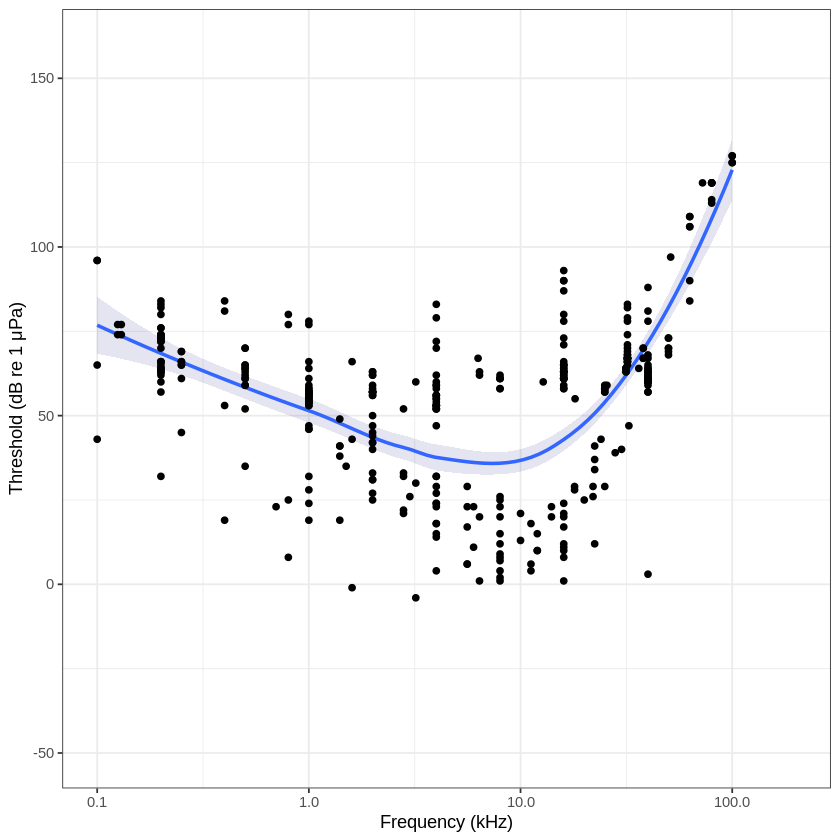

In [6]:
library(ggplot2)

# prepare the labels for the plot axes
label_x <- "Frequency (kHz)"
label_y <- paste0("Threshold (dB ", audiogram$SPL.reference[1], ")")

# add some sensible limits
limits_x <- c(0.1, 200)  # Plot frequencies from 0.1 to 200 kHz
limits_y <- c(-50, 160)  # Plot SPL from -50 to 160 dB

ggplot(audiogram, aes(Frequency.in.kHz, SPL)) +
    labs(x = label_x, y = label_y) +
    geom_smooth(method='loess', formula = y ~ x, fill='navy', alpha=0.1) +
    geom_point() +
    scale_x_log10(limits = limits_x) +
    scale_y_continuous(limits = limits_y) +
    theme_bw()